<a href="https://colab.research.google.com/github/kellysolanomt/MetNumUN2024I/blob/main/Lab9.2/ksolanoc_LABCramer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Presentado por Kelly Johana Solano Calderón* 💗


### Cramer by hand

$$A = \left[
  \begin{array}{cc}
1 & 2\\
3 & 4
\end{array}
\right],  
b= \left[
\begin{array}{c}
5\\
6
\end{array}
\right]
$$
$$
Ax =B
$$
$$  
\left[
  \begin{array}{cc}
1 & 2\\
3 & 4
\end{array}
\right]
\left[
\begin{array}{c}
x_1\\
x_2
\end{array}
\right]  
=
\left[
\begin{array}{c}
5\\
6
\end{array}
\right]
$$

$$Det\ A =  (1 * 4) - (3 * 2)  = 4 - 6 = -2$$

$$A_1 = \left[
  \begin{array}{cc}
5 & 2\\
6 & 4
\end{array}
\right]
$$

$$Det\ A_1 = (5 * 4) - (6 * 2) = 20 - 12 =  8$$

$$x_1 =  \frac{Det\ A_1}{Det\ A}= \frac{8}{-2} =  -4$$

$$A_2 = \left[
  \begin{array}{cc}
1 & 5\\
3 & 6
\end{array}
\right]
$$

$$Det\ A_2 = (1*6) - (3*5)  = 6 -15 = -9$$

$$x_2 = \frac{Det\ A_2}{Det\ A}= \frac{-9}{-2} =  \frac{9}{2}$$

- ***Adding a single digit to any number requires about 7.30 bits of processing.*** - World Mental Calculation: News and Resources for Competitive and Advanced Mental Calculation https://worldmentalcalculation.com/2019/06/30/fastest-possible-processing-speed-of-the-human-brain/

- ***The human brain can process 11 million bits of information every second. But our conscious minds can handle only 40 to 50 bits of information a second.*** - Understanding Unconscious Bias https://www.npr.org/2020/07/14/891140598/understanding-unconscious-bias

- ***A new way to analyze human reaction times shows that the brain processes data no faster than 60 bits per second.***- New Measure of Human Brain Processing Speed https://www.technologyreview.com/2009/08/25/210267/new-measure-of-human-brain-processing-speed/




# Number of operations to compute a determinant by cofactor expasion
- Cofactor expansion https://people.math.carleton.ca/~kcheung/math/notes/MATH1107/07/07_cofactor_expansion.html
## Definition of A(i∣j)
Let $A$ be an $n\times n$ matrix. Let $i,j \in \{1,…,n\}$. We define $A(i∣j)$  to be the matrix obtained from $A$ by removing row $i$ and column $j$ from $A$.

## Cofactor formula
One way of computing the determinant of an $n\times n$  matrix

$$A = \left[
  \begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots  & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}\\
\end{array}
\right]
$$
is to use the following formula called the cofactor formula.

Pick either any $i\ \in \{1,…,n\}$ (fixed row) or $i\ \in \{1,…,n\}$ (fixed column). Then

$$\det(A)  = \sum_{j=1}^n (-1)^{i+j}a_{ij} \det(A(i∣j)) $$


$C_{i,j}= (-1)^{i+j}a_{ij} \det(A(i∣j))$ is called a cofactor of $A$.

$$\det(A)  = \sum_{j=1}^n C_{i,j} $$



In [ ]:
# Code from https://stackoverflow.com/questions/16510111/computing-determinant-of-a-matrix-nxn-recursively

import numpy as np

def smaller_matrix(original_matrix,row, column):
    for ii in range(len(original_matrix)):
        new_matrix=np.delete(original_matrix,ii,0)
        new_matrix=np.delete(new_matrix,column,1)
        return new_matrix


def determinant(matrix):
    """Returns a determinant of a matrix by recursive method."""
    (r,c) = matrix.shape
    if r != c:
        print("Error!Not a square matrix!")
        return None
    elif r==2:
        simple_determinant = matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]
        return simple_determinant
    else:
        answer=0
        for j in range(r):
            cofactor = (-1)**(0+j) * matrix[0][j] * determinant(smaller_matrix(matrix, 0, j))
            answer+= cofactor
        return answer

In [ ]:
#test the function
#Only works for numpy.array input
np.random.seed(1)

In [ ]:
n = 2
matrix=np.random.randint(-5,5,size=(n,n))
matrix

array([[0, 3],
       [4, 0]])

In [ ]:
determinant(matrix)

-12

In [ ]:
np.linalg.det(matrix)

-12.0

In [ ]:
round(np.linalg.det(matrix))

-12

In [ ]:
n = 5
matrix=np.diag(np.random.randint(-10,10,size=(n)))
matrix

array([[  5,   0,   0,   0,   0],
       [  0, -10,   0,   0,   0],
       [  0,   0,   6,   0,   0],
       [  0,   0,   0,  -9,   0],
       [  0,   0,   0,   0,   2]])

In [ ]:
determinant(matrix)

5400

In [ ]:
np.linalg.det(matrix)

5400.000000000003

In [ ]:
round(np.linalg.det(matrix))

5400

In [ ]:
# Modified from the previous code
import numpy as np

# A a squared numpy matrix
def det(A):
    """Returns a determinant of a matrix by recursive method."""
    (r,c) = A.shape
    if r != c:
        print("Error!Not a square matrix!")
        return None
    elif r==1:
          # the code with  r==2 is more efficient but we use this
         # because the number of operations is easier to compute
        return A[0][0]
    else:
        answer=0
        for j in range(r):
            s = 1 if (0+j)%2 == 0 else -1
            Aij = np.delete(A,0,0)
            Aij = np.delete(Aij,j,1)
            cofactor = (s) * A[0][j] * det(Aij)
            answer+= cofactor
        return answer

In [ ]:
#test the function
#Only works for numpy.array input
np.random.seed(1)

In [ ]:
n = 2
A=np.random.randint(-5,5,size=(n,n))
A

array([[0, 3],
       [4, 0]])

In [ ]:
det(A)

-12

In [ ]:
determinant(A)

-12

In [ ]:
np.linalg.det(A)

-12.0

In [ ]:
round(np.linalg.det(A))

-12

In [ ]:
n = 10

A=np.random.randint(-10,10,size=(n,n))

A

array([[  5, -10,   6,  -9,   2,  -3,   3,  -4,   8,  -5],
       [  8,   1,   0,   4,   8,  -6,  -1,   7, -10,   3],
       [ -1,  -1,  -3,  -9, -10,   7,  -2,   3,   9,   5],
       [  0,  -2,  -3,  -7,  -4,   7,  -7,  -6,   7,   1],
       [  2,   6,   3,   9,  -1,   8,   5, -10,  -6,   5],
       [ -8,  -3,  -2,  -1,  -7,  -3,  -6,  -5,   9,  -4],
       [ -2, -10,  -8,   0,   5,   5,  -3,   9,   0,   4],
       [-10,  -9,   7,   3,  -7, -10,   3,  -4,  -4,  -8],
       [  2,   1,  -3,   3,  -2,   1,   2,   1,  -6,  -3],
       [ -3,   3,  -6,   6,   8, -10,   3,   0,   7,  -3]])

In [ ]:
import time

start_time = time.time()
d = det(A)
end_time = time.time()

In [ ]:
print("det(A): ",d)
print("time: ",end_time - start_time)

det(A):  29129065307
time:  73.26186466217041


In [ ]:
import time

start_time = time.time()
d = determinant(A)
end_time = time.time()

In [ ]:
print("determinant(A): ",d)
print("time: ",end_time - start_time)

determinant(A):  29129065307
time:  34.23689007759094


In [ ]:
import time

start_time = time.time()
d = np.linalg.det(A)
end_time = time.time()

In [ ]:
print("np.linalg.det(A): ",d)
print("time: ",end_time - start_time)

np.linalg.det(A):  29129065306.99992
time:  0.0003108978271484375


# Estimating the time by instruction in Python in a Colab machine

In [ ]:
import numpy as np

n = 100

A = np.ones((n,n))

A

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
B = np.ones((n,n))

B

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
import time

C= np.zeros((n,n))

start_time = time.time()
for i in range(n):
        for j in range(n):
            C[i][j] = 0
            for k in range(len(A[0])):
                C[i][j] += A[i][k] * B[k][j]
end_time = time.time()
print(end_time - start_time)

1.178037166595459


In [ ]:
C

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [ ]:
time_by_oper_python = (end_time - start_time)/(2*n**3 - n**2)

time_by_oper_python

5.9197847567611e-07

In [ ]:
import time
import numpy as np

start_time = time.time()
C = A@B
end_time = time.time()
print(end_time - start_time)

0.0018067359924316406


In [ ]:
C

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [ ]:
time_by_oper_numpy = (end_time - start_time)/(2*n**3 - n**2)

time_by_oper_numpy

9.079075338852465e-10

# Time estimation for the digital computer computation of a 3 x 3 matrix determinant by cofactor expansion

The number of operations $(+,-,*)$ perfomed  *det(A)* algorithm that calculates

$$\det(A)  = \sum_{j=1}^n (-1)^{i+j}a_{ij} \det(A(i∣j)) $$

is given by

$$\begin{array}{lll}
T(n) & =&  nT(n-1) + 5n , T(1) = 1\\
\end{array}
$$

$$\begin{array}{lll}
T(n) & =&  nT(n-1) + 5n\\
     & =&  n[(n-1) T(n-2) + 5 (n-1) +10] + 5n  \\
     & =&  n(n-1) T(n-2) + 5 n  (n-1) + 5n \\
     & =&  n(n-1) [(n-2) T(n-3) + 5 (n-2)] + 5 n(n-1) + 5n\\
     & = & n(n-1)(n-2) T(n-3) + 5n(n-1)(n-2)+  5 n  (n-1) + 5n \\
     & \vdots\\
     & = &  n(n-1)(n-2)\cdots (n -(n-2))  T(1) + [5n(n-1)(n-2)(n-3)\cdots (n -(n-3))] + \cdots + [5 n (n-1)]+ 5n \\
    & = & n! + [5n(n-1)(n-2)(n-3)\cdots 2] + [5n(n-1)(n-2)(n-3)\cdots 3]+ \cdots +[5 n (n-1) (n-3)] + [5 n (n-1)]+ 5n  
\end{array}
$$

$$T(n) = n! + 5 \sum_{i=0}^{n-1} n!/i! = n! + 5 n!\sum_{i=0}^{n-1} \frac{1}{i!} < n! + 5 e n! < 16 n!  $$

1. Asumming that an arithmetic operation takes the *time_by_oper_python* estimated before,  what is the maximun square matrix size for which the deteminant can be computed with cofactor extesion in $\le$ 3 minute. Report the time at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing).

2. Run an experiment with a random matrix of that size and report the time at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing).

If the determinant of a $n \times n$ square matrix takes $16 n!$ operations how much takes the Crammer solution of $n \times n$ systems of linear equations?






### Punto 1

In [41]:
import time
import math
time_op = time_by_oper_python

def num_operations(size):
    if size==1:
        return 1
    return size * num_operations(size - 1) + 5 * size
    # operaciones = math.factorial(size) + 5 * math.e * math.factorial(size)
    # return operaciones

def max_matrix_size(max_time):
    min_to_sec = max_time * 60
    current_size = 0
    result = 0

    while result <= min_to_sec:
        current_size += 1
        result = num_operations(current_size) * time_op

    current_size -= 1
    result_final = num_operations(current_size) * time_op
    return [current_size, result_final]


max_size = max_matrix_size(3)[0]
max_size

print("Max size of matrix: " + str(max_size) + "\nTime: " + str(max_matrix_size(3)[1]))

Max size of matrix: 10
Time: 20.60398843944971


### Punto 2

In [55]:
matrix_size = np.random.randint(-10,10,size=(max_size,max_size))
start_time_1 = time.time()
determinant_1 = det(matrix_size)
final_time_1 = time.time() - start_time_1
print(f"El tiempo de ejecución usando det(A) es de: {final_time_1} segundos")
print(f"El determinante con det(A) es: {determinant_1}")

start_time_2 = time.time()
determinant_2 = np.linalg.det(matrix_size)
final_time_2 = time.time() - start_time_2

print(f"El tiempo de ejecución usando np.linalg.det(A) es de: {final_time_2} segundos")
print(f"El determinante con np.linalg.det(A) es: {determinant_2}")


El tiempo de ejecución usando det(A) es de: 72.40193915367126 segundos
El determinante con det(A) es: -2290186236
El tiempo de ejecución usando np.linalg.det(A) es de: 0.00025343894958496094 segundos
El determinante con np.linalg.det(A) es: -2290186236.0000076


Pregunta:

If the determinant of a  $n×n$  square matrix takes  $16n!$  operations how much takes the Crammer solution of  $n×n$  systems of linear equations?

Respuesta:

Según la siguiente fuente ([regla de Crammer](https://www.thermopedia.com/content/672/#:~:text=The%20number%20of%20operations%20required,to%20(n%2B1))), la cantidad de operaciones aproximada en la regla de Cramer es proporcional al calculo de $(n-1)$ determinantes, esto indica que para obtener la respuesta de solución a una matriz por regla de Cramer, se requieren $(n-1) \cdot 16n!$ operaciones.

# Time estimation for the human computer computation of a 3 x 3 matrix determinant by cofactor expansion

 Write a 3 x 3 matrix with the first element as your list number Mod 10 and the rest row by row 1,2,3,...9 skipimg the first element, by example if youir list number is 12, your list number Mod 10 is 2 and the matrix is
$$A = \left[
  \begin{array}{ccc}
2 & 1 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{array}
\right]
$$
Use a chronometer like http://online-stopwatch.chronme.com/ to estimate the time to compute the determinant by using the procedure in the follo wing exmaple (https://people.math.carleton.ca/~kcheung/math/notes/MATH1107/07/07_cofactor_expansion.html):<br />  
Let
$$A = \begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6\\ 7 & 8 & 9 \end{bmatrix}$$
we compute $\det(A)$ by expanding along row $2$ as <br /> <br />
$$\begin{eqnarray} \det(A) & = & (-1)^{2+1}A_{2,1}\det(A(2 \mid 1)) + (-1)^{2+2}A_{2,2}\det(A(2 \mid 2)) + (-1)^{2+3}A_{2,3}\det(A(2 \mid 3)) \\ & = & -4\left|\begin{matrix} 2 & 3 \\ 8 & 9\end{matrix}\right| + 5\left|\begin{matrix} 1 & 3 \\ 7 & 9\end{matrix}\right| - 6\left|\begin{matrix} 1 & 2 \\ 7 & 8\end{matrix}\right| \\ & = & -4(2\cdot 9 - 3\cdot 8) + 5(1 \cdot 9- 3\cdot 7) - 6(1\cdot 8 - 2 \cdot 7) \\ & = & 24 - 60 + 36 \\ & = & 0 \end{eqnarray}$$
3. Report the time at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing)
4. Report the value of the determinant at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing)




---



***Matriz propia*** \\
\begin{gather}
    \text{Número en la lista: } 50\\
    50mod(10)=0
\end{gather}
Matriz resultante:

\begin{equation}
A =
    \begin{pmatrix}
    0 & 1 & 2 \\
    3 & 4 & 5 \\
    6 & 7 & 8
    \end{pmatrix}
\end{equation}

### Punto 3

Tiempo estimado de calculo de determinante a mano: *00:00:58.523*

###	Label	Interval	Total	Time Recorded
2	Pause	---	---	Thu, 2 May 2024, 15:17:32.925
1	Split	00:00:58.523	00:00:58.523	Thu, 2 May 2024, 15:17:32.925
	Start	---	---	Thu, 2 May 2024, 15:16:34.402

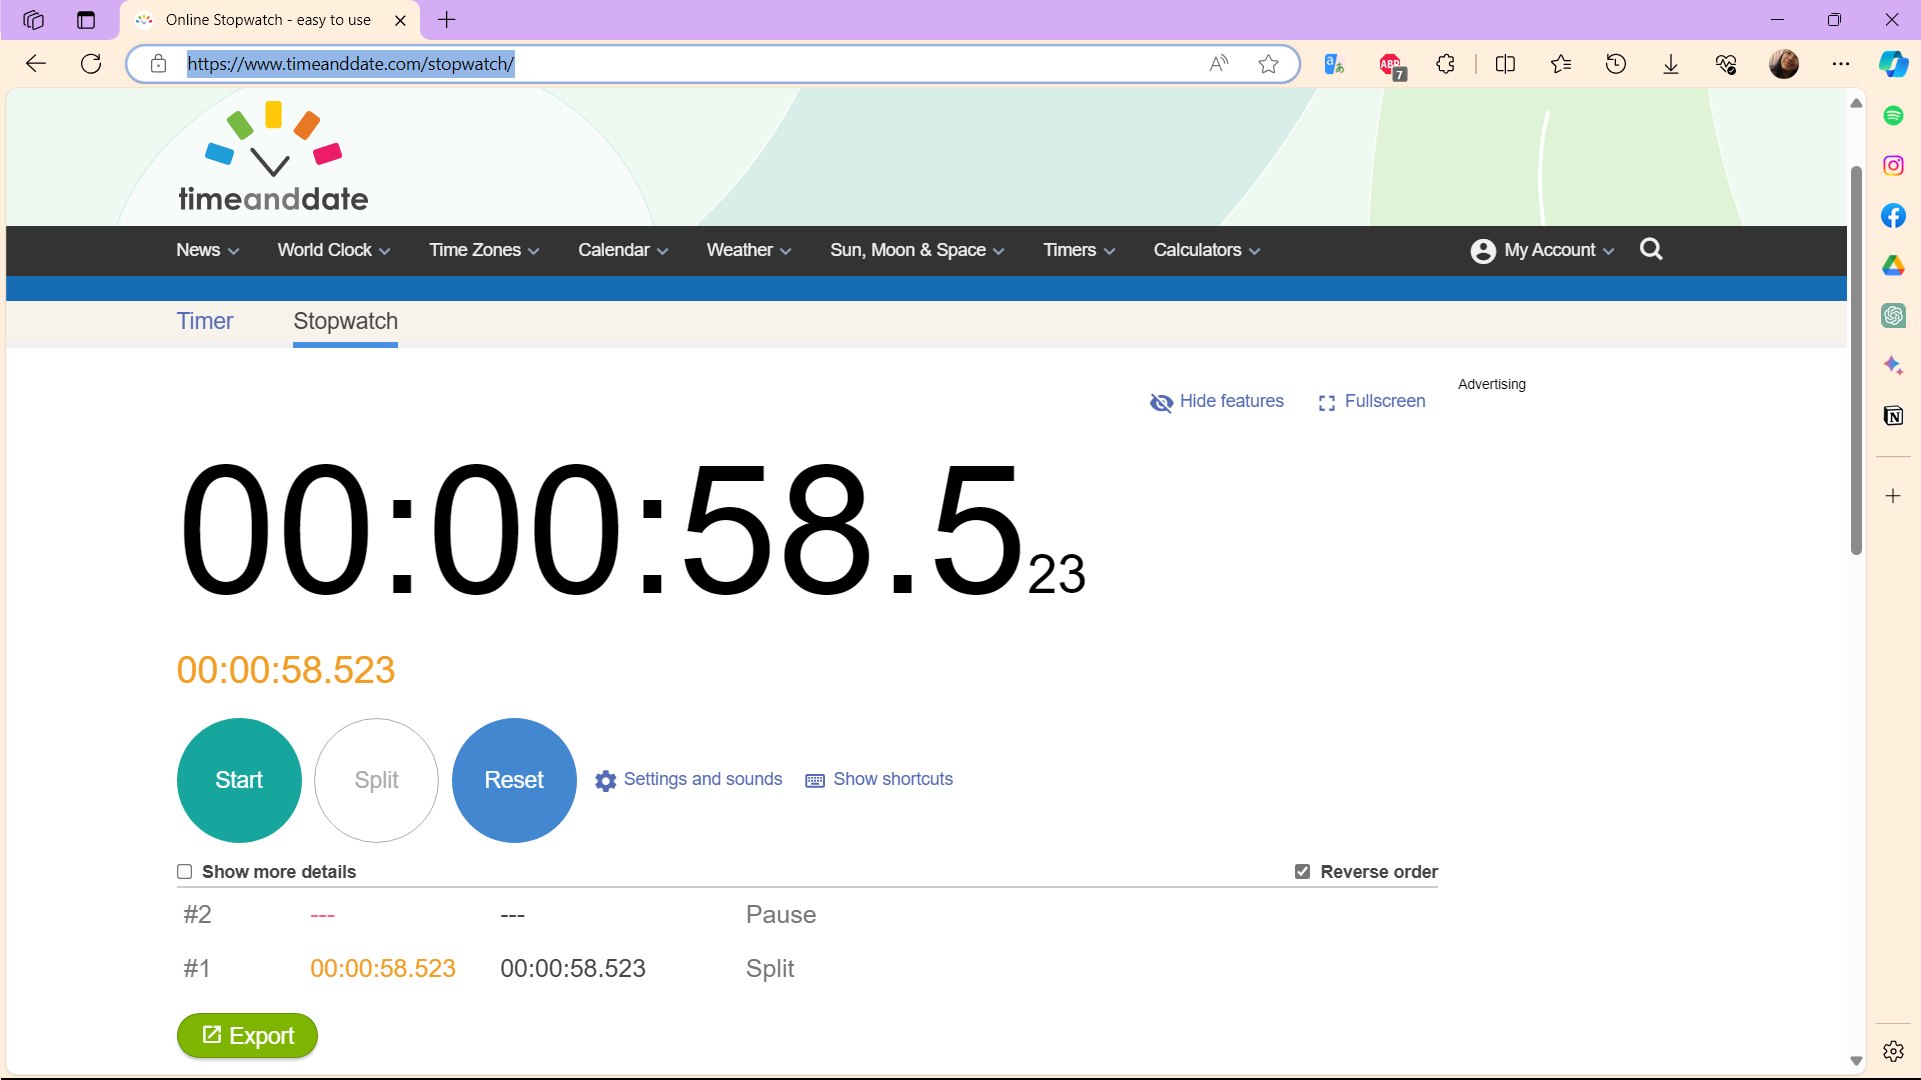

Tiempo por medio de algoritmo:

In [56]:
import numpy as np
import time

matriz_propia = np.array([[0,1,2],[3,4,5],[6,7,8]])

def det_cofactor_exp(matrix):
    a, b, c = matrix[0]
    det_1 = a * ((matrix[1][1] * matrix[2][2]) - (matrix[1][2] * matrix[2][1]))
    det_2 = (-1) * b * ((matrix[1][0] * matrix[2][2]) - (matrix[1][2] * matrix[2][0]))
    det_3 = c * ((matrix[1][0] * matrix[2][1]) - (matrix[1][1] * matrix[2][0]))
    return det_1 + det_2 + det_3

start_time_det = time.time()
det_matriz_propia = det_cofactor_exp(matriz_propia)
final_time_det = time.time() - start_time_det

print(f"El resultado de la matriz propia es: {det_matriz_propia}")
print(f"El tiempo de ejecución fue de: {final_time_det} segundos")

El resultado de la matriz propia es: 0
El tiempo de ejecución fue de: 0.0025773048400878906 segundos


### Punto 4

El resultado del determinante es 0,

\begin{equation}
A =
    \begin{pmatrix}
    0 & 1 & 2 \\
    3 & 4 & 5 \\
    6 & 7 & 8
    \end{pmatrix}
\end{equation}

Calculo el $\det(A)$ por medio de la fila $1$ como: <br /> <br />
$$\begin{eqnarray}
 \det(A)
 & = & (-1)^{1+1}A_{1,1}\det(A(1 \mid 1)) + (-1)^{1+2}A_{1,2}\det(A(1 \mid 2)) + (-1)^{1+3}A_{1,3}\det(A(1 \mid 3)) \\
 & = & 0\left|\begin{matrix} 4 & 5 \\ 7 & 8\end{matrix}\right|
     - 1\left|\begin{matrix} 3 & 5 \\ 6 & 8\end{matrix}\right|
     + 2\left|\begin{matrix} 3 & 4 \\ 6 & 7\end{matrix}\right| \\
& = & 0(4\cdot 8 - 5\cdot 7) - 1(3 \cdot 8- 5\cdot 6) + 2(3\cdot 7 - 4 \cdot 6) \\ & = & 0 + 6 - 6 \\
& = & 0
\end{eqnarray}$$

